In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
import glob
import string

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Carregar Dados

In [3]:
files=glob.glob('../archive/*.csv')
files

['../archive/parque_nacional_iguacu.csv',
 '../archive/parque_chapada_dos_veadeiros.csv',
 '../archive/museu_imperial.csv',
 '../archive/mercado-central-fortaleza-ce.csv',
 '../archive/jardim_botanico.csv',
 '../archive/aqua-rio-rj.csv',
 '../archive/mercado-ver-o-peso-pa.csv',
 '../archive/praia-copacabana-rj.csv',
 '../archive/elevador_lacerda.csv',
 '../archive/pelourinho_ba.csv',
 '../archive/museu_arte_sp.csv',
 '../archive/praca-3-poderes-br.csv',
 '../archive/parque_jalapao.csv',
 '../archive/hopi_hari.csv',
 '../archive/beto-carreiro-sc.csv']

In [4]:
#dados será um dicionário com os comentários e as notas de cada usuário
# as chaves do dicionário são os nomes dos destinos turísticos

dados={}

for file in files:
    dados[file.split('/')[-1].split('.')[0]]=pd.read_csv(file, delimiter=';')



In [5]:
dados.keys()
nomes_destinos=list(dados.keys())

# Análise Exploratória - Notas

## Comparativo entre as notas das atrações

In [6]:
#Verificando a existência de entradas nulas
print('Número de entradas nulas para as notas das atrações:')
print('')
for nome in nomes_destinos:
    print(nome+ ' : {}'.format(dados[nome]['nota'].isnull().sum()))

Número de entradas nulas para as notas das atrações:

parque_nacional_iguacu : 0
parque_chapada_dos_veadeiros : 0
museu_imperial : 0
mercado-central-fortaleza-ce : 0
jardim_botanico : 0
aqua-rio-rj : 0
mercado-ver-o-peso-pa : 0
praia-copacabana-rj : 0
elevador_lacerda : 0
pelourinho_ba : 0
museu_arte_sp : 0
praca-3-poderes-br : 0
parque_jalapao : 0
hopi_hari : 0
beto-carreiro-sc : 0


In [7]:
 
def calcular_proporcao_notas(dados):
    '''
    Função exibe o número de votos que atribuiu cada nota e a proporção desse número de votos em relação ao total 
    de votos para a atração selecionada

    input - dicionário com conjunto de dados para cada atração

    '''
    cont=0
    print('Número correpondente a cada atração')
    for i in dados.keys():
        print(str(cont) +'-' +i )
        cont+=1
    
    
    num=None
    while num not in np.arange(0,15):
        try:
            num=input('Selecione a atração (digite o número correpondente a atração desejada ou -1 para sair): ')
            num=int(num)
            if num not in np.arange(0,15):
                raise Exception()
        except:
            if num==-1:
                return None
            print('Entrada Inválida. Digite o número da atração desejada ou -1 para sair')
    nome_atracao=list(dados.keys())[num]
    dados_atracao=dados[nome_atracao]
    notas_atracao=dados_atracao.groupby('nota').agg(Número_de_Avaliações=('nota','count'))
    notas_atracao['Proporção de Avaliações']=notas_atracao['Número_de_Avaliações']/notas_atracao['Número_de_Avaliações'].sum()
    print('')
    print('Nome da atração: {}'.format(nome_atracao))
    print('Total de avaliações: {}'.format(notas_atracao['Número_de_Avaliações'].sum()))
    print(notas_atracao)
    

    
                 

In [8]:
proporcao_notas=[]
for destino in nomes_destinos:
    #x=dados[nome_atracao].groupby('nota').agg(Total=('nota','count'))
    proporcao_notas+=[[(dados[destino]['nota']==nota).sum() for nota in [1,2,3,4,5]]]
proporcao_notas=pd.DataFrame(proporcao_notas,index=nomes_destinos)
proporcao_notas["Total Avaliações"]=proporcao_notas.sum(axis=1)
proporcao_notas.iloc[:,:5]=proporcao_notas.iloc[:,:5].div(proporcao_notas["Total Avaliações"],axis=0)
proporcao_notas.columns=   ['nota 1(%)',
                            'nota 2(%)',
                            'nota 3(%)',
                            'nota 4(%)',
                            'nota 5(%)',
                             "Total Avaliações"]

In [9]:
proporcao_notas

,nota 1(%),nota 2(%),nota 3(%),nota 4(%),nota 5(%),Total Avaliações
parque_nacional_iguacu,0.001532,0.001892,0.011715,0.126881,0.857980,11097
parque_chapada_dos_veadeiros,0.002203,0.003672,0.021667,0.148366,0.824091,2723
museu_imperial,0.002822,0.005080,0.034994,0.247778,0.709327,7087
mercado-central-fortaleza-ce,0.012190,0.028059,0.194112,0.402254,0.363385,4348
jardim_botanico,0.001403,0.003724,0.050498,0.253458,0.690916,20674
aqua-rio-rj,0.025720,0.048583,0.150750,0.322220,0.452727,4199
mercado-ver-o-peso-pa,0.046576,0.079845,0.222345,0.319379,0.331855,3607
praia-copacabana-rj,0.011091,0.023617,0.117563,0.278314,0.569415,7664
elevador_lacerda,0.026991,0.064808,0.278066,0.317959,0.312176,6743
pelourinho_ba,0.024637,0.040003,0.165692,0.352347,0.417321,11974


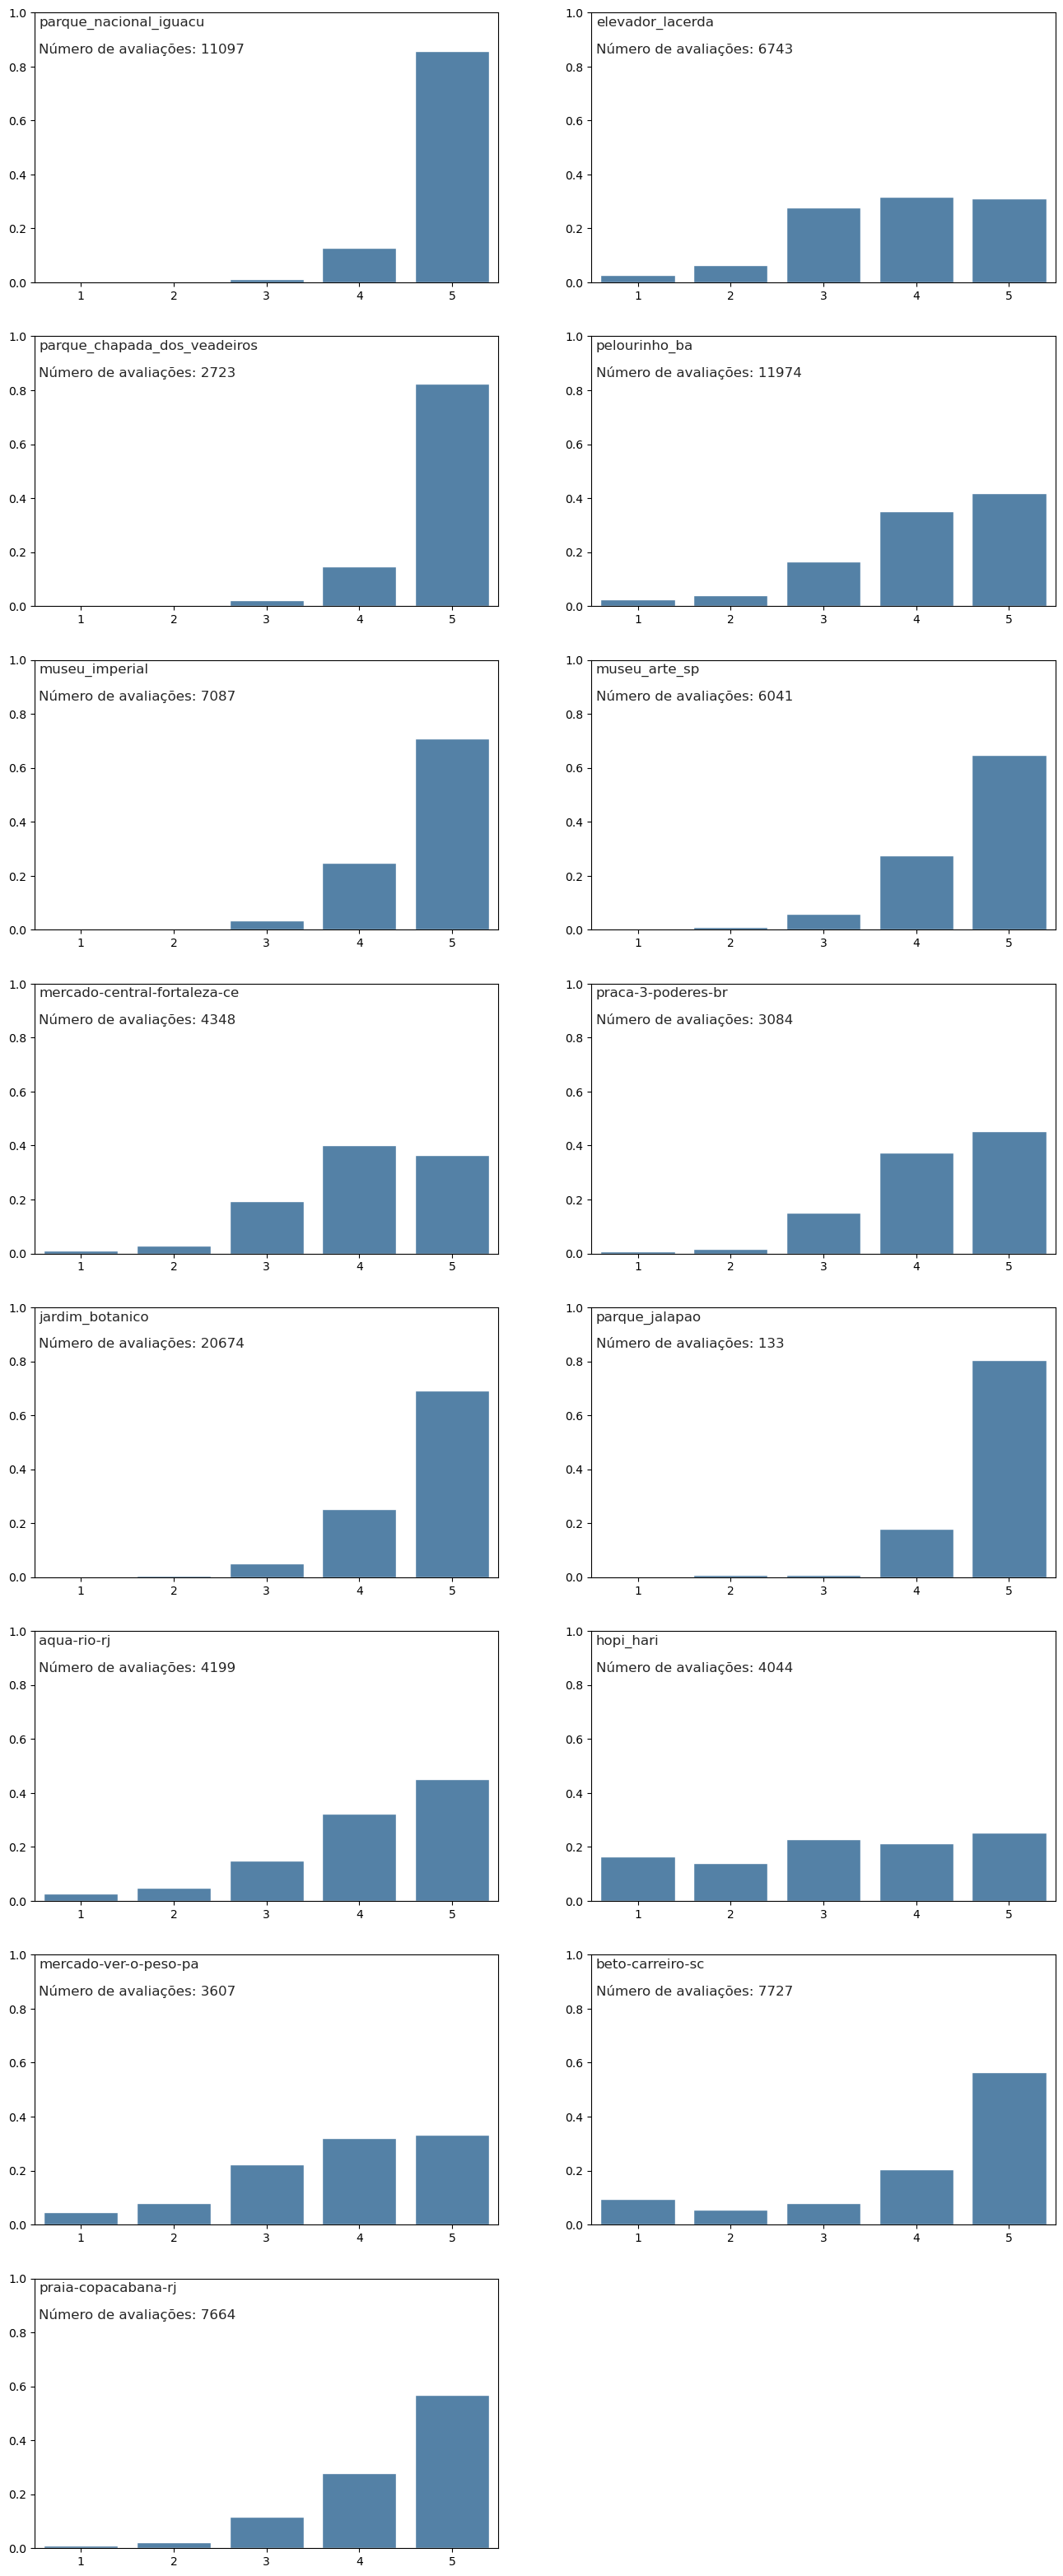

In [10]:
#Plotar graficos com as proporções das avaliações para cada atração
fig,axs=plt.subplots(8,2,figsize=(16,40))
sns.set_theme(style='darkgrid')
row_subplot=0
col_subplot=0
plt.title('Proporção das avaliações para cada atração')
for num_destino in range(len(proporcao_notas)):
    destino=proporcao_notas.index[num_destino]
    ax=sns.barplot(x=[1,2,3,4,5],y=proporcao_notas.iloc[num_destino,:5],ax=axs[row_subplot,col_subplot],color='steelblue')
    ax.text(-0.45, 0.95, destino)
    ax.text(-0.45, 0.85, "Número de avaliações: {}".format(proporcao_notas.loc[destino,'Total Avaliações']))
    ax.set(ylabel=None)
    ax.set_ylim(0,1)
    row_subplot+=1
    if row_subplot>7:
        row_subplot=0
        col_subplot=1
fig.delaxes(axs[7][1])


In [11]:
#Criação de dataframe com proporção de avaliações negativas, neutras e positivas

#Avaliação negativa - notas 1 e 2
#Avaliação neutra   - nota 3
#Avaliação positiva - notas 4 e 5


pos_neutra_neg=pd.concat((proporcao_notas.iloc[:,:2].sum(axis=1),
                          proporcao_notas.iloc[:,2],
                          proporcao_notas.iloc[:,3:5].sum(axis=1)),axis=1)
pos_neutra_neg.columns=['Negativas(%)',
                        'Neutras(%)',
                        'Positivas(%)']

pos_neutra_neg

,Negativas(%),Neutras(%),Positivas(%)
parque_nacional_iguacu,0.003424,0.011715,0.984861
parque_chapada_dos_veadeiros,0.005876,0.021667,0.972457
museu_imperial,0.007902,0.034994,0.957105
mercado-central-fortaleza-ce,0.040248,0.194112,0.765639
jardim_botanico,0.005127,0.050498,0.944375
aqua-rio-rj,0.074303,0.150750,0.774946
mercado-ver-o-peso-pa,0.126421,0.222345,0.651234
praia-copacabana-rj,0.034708,0.117563,0.847730
elevador_lacerda,0.091799,0.278066,0.630135
pelourinho_ba,0.064640,0.165692,0.769668


[[<matplotlib.axis.YTick at 0x7f291baeb090>,

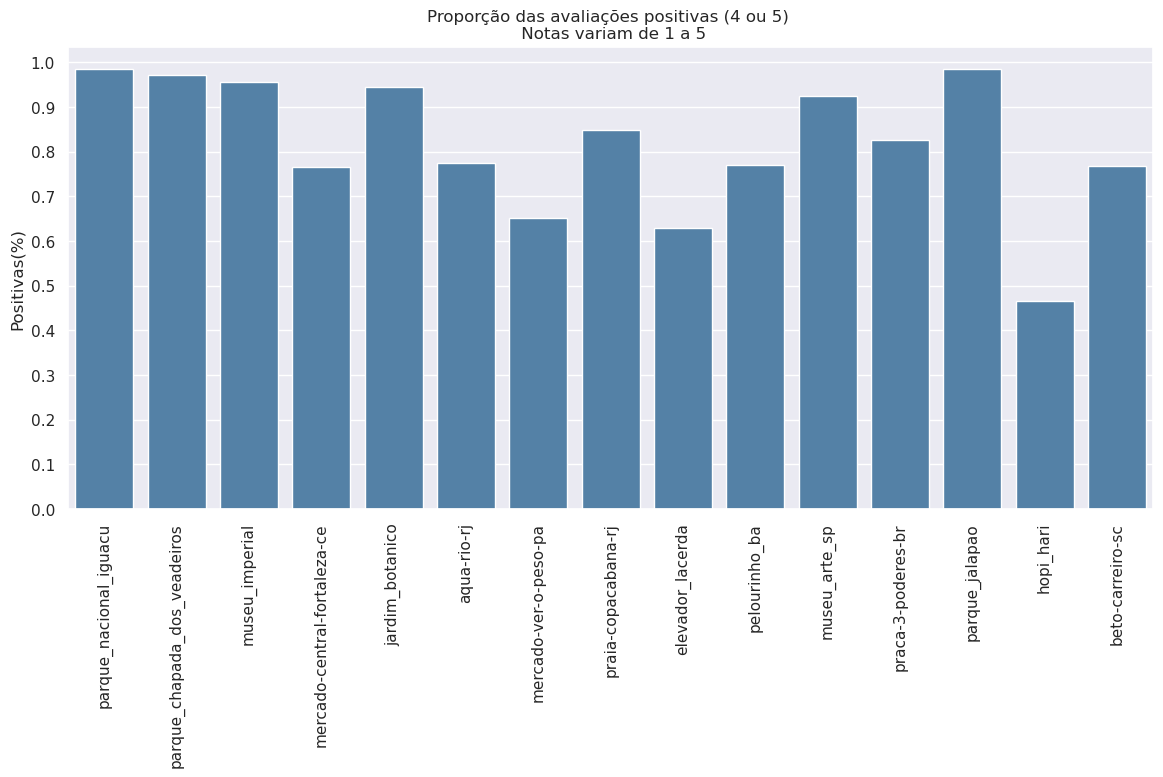

In [12]:
plt.figure(figsize=(14,6))
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
plt.title('Proporção das avaliações positivas (4 ou 5) \n Notas variam de 1 a 5')
g=sns.barplot(pos_neutra_neg,x=pos_neutra_neg.index,y=pos_neutra_neg['Positivas(%)'],color='steelblue')
g.set(yticks=np.arange(0,1.1,0.1))


[[<matplotlib.axis.YTick at 0x7f291a9075d0>,

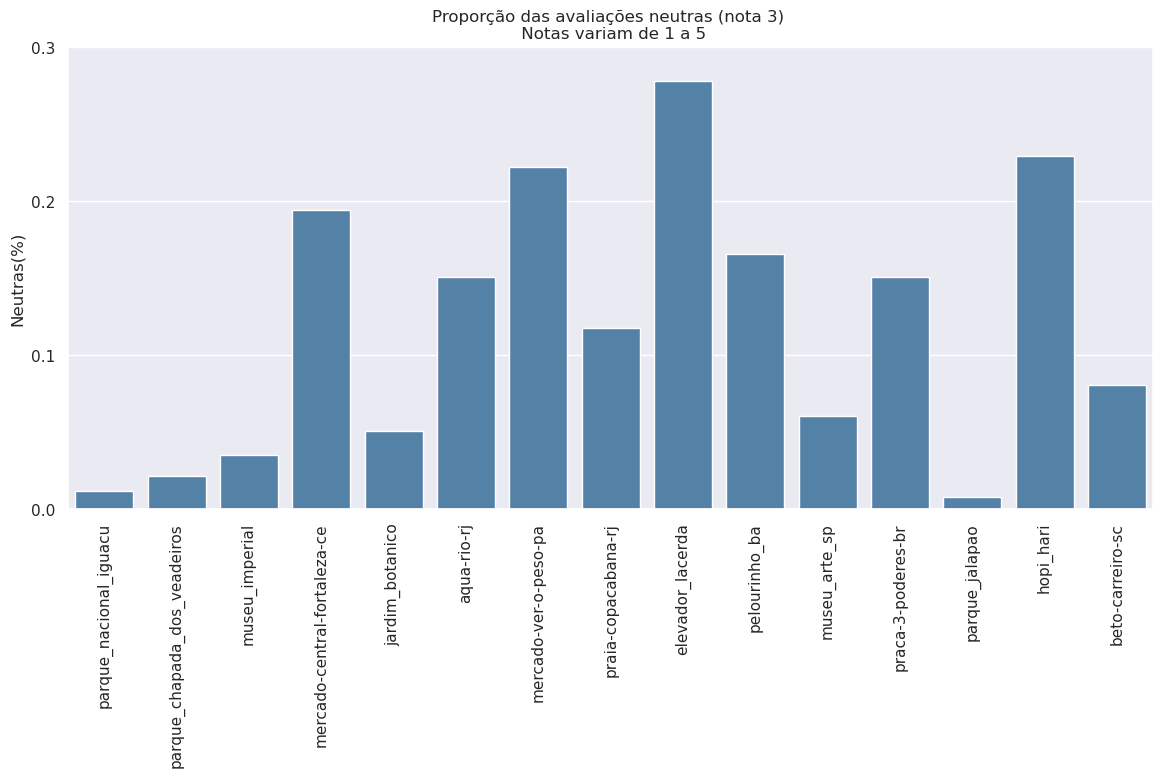

In [13]:
plt.figure(figsize=(14,6))
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
plt.title('Proporção das avaliações neutras (nota 3) \n Notas variam de 1 a 5')
g=sns.barplot(pos_neutra_neg,x=pos_neutra_neg.index,y=pos_neutra_neg['Neutras(%)'],color='steelblue')
g.set(yticks=np.arange(0,0.4,0.1))

[[<matplotlib.axis.YTick at 0x7f291a854e90>,

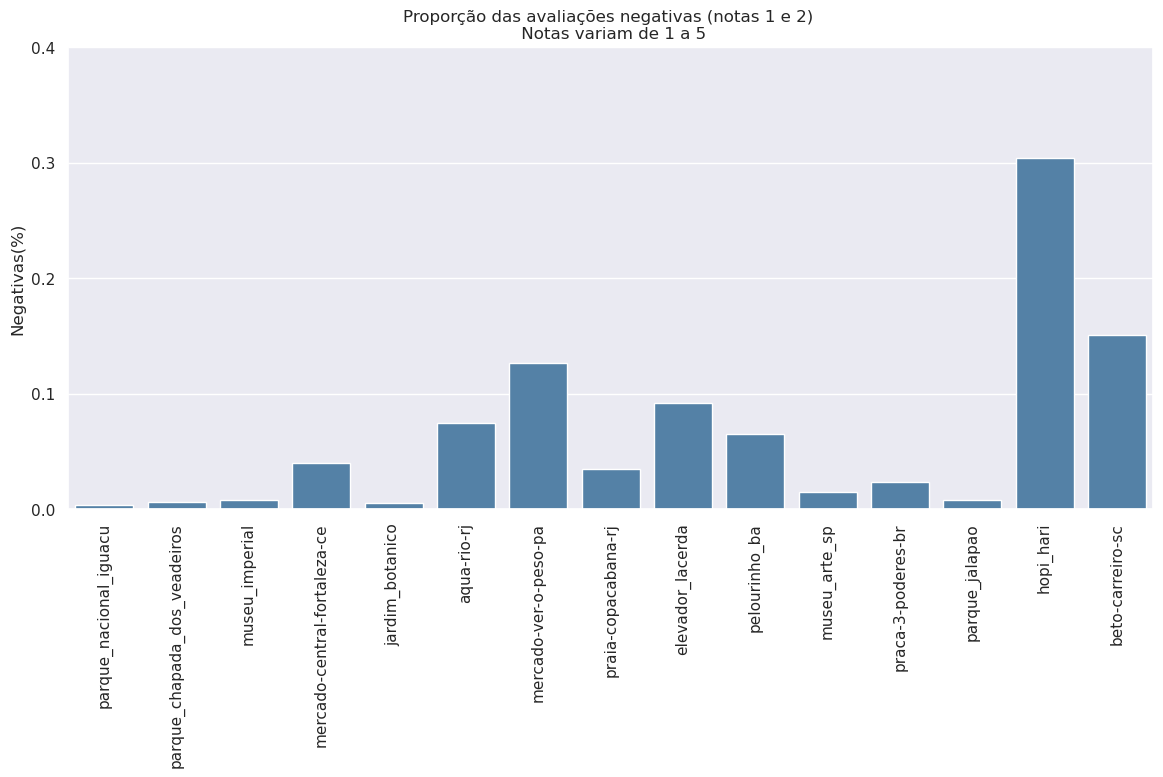

In [14]:
plt.figure(figsize=(14,6))
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
plt.title('Proporção das avaliações negativas (notas 1 e 2) \n Notas variam de 1 a 5')
g=sns.barplot(pos_neutra_neg,x=pos_neutra_neg.index,y=pos_neutra_neg['Negativas(%)'],color='steelblue')
g.set(yticks=np.arange(0,0.5,0.1))

In [15]:
'''
#Plotar graficos com as proporções das avaliações para cada atração
fig,axs=plt.subplots(8,2,figsize=(16,40))
row_subplot=0
col_subplot=0
for atracao in nome_atracoes:
    notas_atracao=dados[atracao]
    notas_atracao=notas_atracao.groupby('nota').agg(Número_de_Avaliações=('nota','count'))
    notas_atracao['Proporção de Avaliações']=notas_atracao['Número_de_Avaliações']/notas_atracao['Número_de_Avaliações'].sum()
    notas_atracao.reset_index(inplace=True)
    ax=sns.barplot(notas_atracao,x='nota',y='Proporção de Avaliações',ax=axs[row_subplot,col_subplot],color='steelblue')
    ax.text(-0.45, 0.95, atracao)
    ax.text(-0.45, 0.85, "Número de avaliações: {}".format(notas_atracao['Número_de_Avaliações'].sum()))
    ax.set_ylim(0,1)
    row_subplot+=1
    if row_subplot>7:
        row_subplot=0
        col_subplot=1
fig.delaxes(axs[7][1])
'''

'\n#Plotar graficos com as proporções das avaliações para cada atração\nfig,axs=plt.subplots(8,2,figsize=(16,40))\nrow_subplot=0\ncol_subplot=0\nfor atracao in nome_atracoes:\n    notas_atracao=dados[atracao]\n    notas_atracao=notas_atracao.groupby(\'nota\').agg(Número_de_Avaliações=(\'nota\',\'count\'))\n    notas_atracao[\'Proporção de Avaliações\']=notas_atracao[\'Número_de_Avaliações\']/notas_atracao[\'Número_de_Avaliações\'].sum()\n    notas_atracao.reset_index(inplace=True)\n    ax=sns.barplot(notas_atracao,x=\'nota\',y=\'Proporção de Avaliações\',ax=axs[row_subplot,col_subplot],color=\'steelblue\')\n    ax.text(-0.45, 0.95, atracao)\n    ax.text(-0.45, 0.85, "Número de avaliações: {}".format(notas_atracao[\'Número_de_Avaliações\'].sum()))\n    ax.set_ylim(0,1)\n    row_subplot+=1\n    if row_subplot>7:\n        row_subplot=0\n        col_subplot=1\nfig.delaxes(axs[7][1])\n'

In [16]:
#Avaliar datas

# Análise Exploratória - Comentários

##  Dataset

In [17]:
#Agrupar os dados de todos os destinos em um mesmo dataframe

for nome_destino in nomes_destinos:
    dados[nome_destino]['destino']=nome_destino
df_dados=pd.concat([dados[destino] for destino in nomes_destinos],axis=0)

In [18]:
df_dados.head()

,comentario,nota,data,destino
0,"Não tem como explicar, precisa ver de perto a ...",5.0,mar de 2023,parque_nacional_iguacu
1,ótimo lugar! tranquilo e com uma energia marav...,5.0,out de 2022,parque_nacional_iguacu
2,Sensacional! O parque tem uma estrutura inigua...,5.0,fev de 2023,parque_nacional_iguacu
3,É um lugar fantástico para ser visitado. As qu...,5.0,fev de 2023,parque_nacional_iguacu
4,O passeio de barco abaixo das quedas é muito e...,5.0,fev de 2023,parque_nacional_iguacu


In [19]:
x_comentarios=df_dados[['comentario']]
y_notas      =df_dados[['nota']]

In [20]:
#Dataset desbalanceado, são poucas avaliações com 1 ou 2 estrelas
y_notas.value_counts()

nota
5.0     58040
4.0     26829
3.0     10902
2.0      2974
1.0      2400
dtype: int64

In [21]:
#Aproximadamente 57% das avaliações receberam nota 5
y_notas.value_counts()/len(y_notas)

nota
5.0     0.573830
4.0     0.265253
3.0     0.107786
2.0     0.029403
1.0     0.023728
dtype: float64

In [22]:
proporcao_notas_negativas=100*(y_notas.value_counts()[3:].sum())/len(y_notas)
print('Proporção das avaliações com notas 1 ou 2: {}%'.format(proporcao_notas_negativas))

Proporção das avaliações com notas 1 ou 2: 5.313164269118592%


In [23]:
#O conjunto de dados seŕa dividido em treino e teste (70% para treino e 20% para teste)
x_treino,x_teste,y_treino,y_teste=train_test_split(x_comentarios,y_notas,test_size=0.2,stratify=y_notas)

In [24]:
#A separação dos dados de treino e teste foi feito de modo estratificado, de modo que a propoção de amostras de cada classe foi mantida após a separação
y_treino.value_counts()/len(y_treino)
pd.concat((y_notas.value_counts()/len(y_notas),
           y_treino.value_counts()/len(y_treino),
           y_teste.value_counts()/len(y_teste)),axis=1).rename(columns={0:'conjunto total',1:'treino',2:'teste'})

,conjunto total,treino,teste
nota,,,
5.0,0.573830,0.573830,0.573830
4.0,0.265253,0.265250,0.265263
3.0,0.107786,0.107791,0.107766
2.0,0.029403,0.029401,0.029413
1.0,0.023728,0.023728,0.023728


In [25]:
#Numero de amostras de cada nota nos dados de treino e teste
pd.concat((y_treino.value_counts(),y_teste.value_counts()),axis=1).rename(columns={0:'treino',1:'teste'})

,treino,teste
nota,,
5.0,46432,11608
4.0,21463,5366
3.0,8722,2180
2.0,2379,595
1.0,1920,480


In [26]:
#num_col_nota=list(df_dados.columns).index('nota')
#num_col_comentario=list(df_dados.columns).index('comentario')

## Pré-processamento dos comentários

### Remoção da pontuação dos comentários e conversão de todas as letras para minúsculas


In [27]:
#Remover pontuação dos comentários usando o método translate

print('Com pontuação e letras maiúsculas e minúsculas: {}'.format(x_treino.iloc[0,0]))
x_treino['comentario']=x_treino['comentario'].apply(lambda x:x.translate(str.maketrans('','',string.punctuation)))
x_treino['comentario']=x_treino['comentario'].apply(lambda x:x.lower())
print('Sem pontuação e somente letras minúsculas: {}'.format(x_treino.iloc[0,0]))


Com pontuação e letras maiúsculas e minúsculas: Adoro esse cantinho, aonde podemos ver toda a arquitetura de Brasília, o Palácio do Planalto, o Stf, o Congresso Nacional, o Palácio dp Planalto, o Panteão e a Bandeira do Brasil em todo seu explendor


Sem pontuação e somente letras minúsculas: adoro esse cantinho aonde podemos ver toda a arquitetura de brasília o palácio do planalto o stf o congresso nacional o palácio dp planalto o panteão e a bandeira do brasil em todo seu explendor


### Análise da frequência que cada palavra aparece nos comentários com cada nota

'''
O número de comentários com cada nota é muito diferente, dificultando a comparação da entre comentários com notas diferentes. Para solucionar essa dificuldade serão 
selecionados dos dados de treino número igual de comentários com cada nota
'''

In [29]:
#Selecionar de forma aleatória número igual de comentários com cada noda
resampler=RandomUnderSampler()
x_res,y_res=resampler.fit_resample(x_treino,y_treino)

In [34]:
pd.concat((y_treino.value_counts(),y_res.value_counts()),axis=1).rename(columns={0:'Inicial',1:'Resampled'})

,Inicial,Resampled
nota,,
1.0,1920,1920
2.0,2379,1920
3.0,8722,1920
4.0,21463,1920
5.0,46432,1920


In [299]:
#Contar o número de vezes que cada palavra aparece nos comentários com a mesma nota e também o número total de vezes que cada palavra aparece
nota1_count=Counter()
nota2_count=Counter()
nota3_count=Counter()
nota4_count=Counter()
nota5_count=Counter()
total_count=Counter()

In [300]:
for num_row in range(len(x_treino)):
    if y_treino.iloc[num_row,0]==1:
        for palavra in x_treino.iloc[num_row,0].split(" "):
            nota1_count[palavra]+=1
            total_count[palavra]+=1

    elif y_treino.iloc[num_row,0]==2:
        for palavra in x_treino.iloc[num_row,0].split(" "):
            nota2_count[palavra]+=1
            total_count[palavra]+=1

    elif y_treino.iloc[num_row,0]==3:
        for palavra in x_treino.iloc[num_row,0].split(" "):
            nota3_count[palavra]+=1
            total_count[palavra]+=1

    elif y_treino.iloc[num_row,0]==4:
        for palavra in x_treino.iloc[num_row,0].split(" "):
            nota4_count[palavra]+=1
            total_count[palavra]+=1

    else:
        for palavra in x_treino.iloc[num_row,0].split(" "):
            if palavra=='preparadosPois':
                teste=x_treino.iloc[num_row,0]
            nota5_count[palavra]+=1
            total_count[palavra]+=1

In [301]:
#Palavras mais comuns nos comentários com nota 1
nota1_count.most_common()

[('de', 5954),
 ('e', 5225),
 ('que', 4283),
 ('o', 4217),
 ('a', 3743),
 ('não', 3181),
 ('para', 2405),
 ('um', 2143),
 ('em', 2009),
 ('parque', 1991),
 ('com', 1989),
 ('do', 1808),
 ('é', 1799),
 ('no', 1779),
 ('', 1705),
 ('uma', 1430),
 ('mais', 1240),
 ('na', 1210),
 ('os', 1154),
 ('se', 1120),
 ('brinquedos', 1085),
 ('as', 1050),
 ('fila', 1030),
 ('da', 983),
 ('por', 904),
 ('muito', 903),
 ('filas', 817),
 ('sem', 725),
 ('mas', 714),
 ('ao', 691),
 ('tem', 691),
 ('foi', 658),
 ('pra', 636),
 ('dia', 632),
 ('pessoas', 602),
 ('ir', 587),
 ('horas', 567),
 ('dos', 548),
 ('só', 496),
 ('estava', 496),
 ('ou', 495),
 ('lugar', 473),
 ('já', 465),
 ('como', 455),
 ('atrações', 445),
 ('era', 420),
 ('fui', 414),
 ('pois', 409),
 ('brinquedo', 406),
 ('nos', 402),
 ('ser', 389),
 ('você', 385),
 ('eu', 385),
 ('lá', 381),
 ('minha', 376),
 ('isso', 367),
 ('são', 365),
 ('até', 357),
 ('mesmo', 357),
 ('das', 352),
 ('tudo', 352),
 ('nem', 352),
 ('nada', 349),
 ('local', 

In [302]:
#Palavras mais comuns nos comentários com nota 5

nota5_count.most_common()

[('e', 72686),
 ('de', 67428),
 ('a', 56255),
 ('o', 51908),
 ('é', 41042),
 ('para', 33506),
 ('que', 31557),
 ('um', 28976),
 ('com', 27689),
 ('muito', 26427),
 ('do', 26348),
 ('', 25079),
 ('uma', 18699),
 ('da', 17245),
 ('não', 17192),
 ('em', 17021),
 ('bem', 14952),
 ('parque', 14558),
 ('no', 14385),
 ('as', 14196),
 ('os', 13608),
 ('lugar', 13525),
 ('tem', 11246),
 ('mais', 10829),
 ('se', 10785),
 ('na', 9413),
 ('vale', 9130),
 ('passeio', 8375),
 ('pena', 8236),
 ('são', 8234),
 ('mas', 8221),
 ('local', 8127),
 ('por', 7842),
 ('ao', 7665),
 ('lindo', 7664),
 ('dos', 7237),
 ('das', 6412),
 ('conhecer', 6024),
 ('tudo', 5826),
 ('ir', 5689),
 ('como', 5680),
 ('jardim', 5613),
 ('visita', 5413),
 ('dia', 5115),
 ('museu', 4988),
 ('cidade', 4950),
 ('quem', 4917),
 ('bom', 4644),
 ('pra', 4549),
 ('cuidado', 4495),
 ('todos', 4440),
 ('você', 4389),
 ('curitiba', 4382),
 ('ou', 4378),
 ('visitar', 4322),
 ('foi', 4195),
 ('pois', 3845),
 ('fotos', 3794),
 ('lá', 3767),

In [303]:
#Palavras menos comuns nos comentários com nota 5
nota5_count.most_common()[-1:-20:-1]

[('criançasvoltarei', 1),
 ('partenão', 1),
 ('boasfuncionários', 1),
 ('ameiorganização', 1),
 ('hotwills', 1),
 ('lojinhasbom', 1),
 ('cunhos', 1),
 ('assoviamtudo', 1),
 ('cachaçaa', 1),
 ('manguostão', 1),
 ('tacacás', 1),
 ('tucupis', 1),
 ('adornosachei', 1),
 ('calçadâo', 1),
 ('pockets', 1),
 ('programacao', 1),
 ('apresentacoes', 1),
 ('2maravilhoso', 1),
 ('divertimentopraça', 1)]

In [304]:
#Palavras menos comuns nos comentários com nota 1
nota1_count.most_common()[-1:-20:-1]

[('descritas', 1),
 ('esquentados', 1),
 ('extrapolado', 1),
 ('investimos', 1),
 ('brinquedosexperiência', 1),
 ('faltar', 1),
 ('22102020', 1),
 ('35º', 1),
 ('saise', 1),
 ('arrecadar', 1),
 ('começavam', 1),
 ('guichês', 1),
 ('estacionamentobem', 1),
 ('anosssss', 1),
 ('fechadosquebrados', 1),
 ('gostava', 1),
 ('criançasnunca', 1),
 ('paísabsurdo', 1),
 ('emigualdade', 1)]

'''
Comparando os comentários com nota 1 e os comentários com nota 5, é possível notar que as palavras mais frequentes em ambos se repetem, são preposições e artigos como por exemplo e, que , de, do. Esses tipos de palavras aparecem comunmente em qualquer frase e não servem para caracterizar um  comentário. Deve-se buscar palavras que aparecem com mais frequência em comentários com determinada nota, espera-se por exemplo que uma palavra como excelente apareça com maior frequência em comentários com nota 5.

Já verificando as palavras que aparecem com menor frequência, verifica-se a ocorrência de palavras com grafia errada e com erros de digitação. Esse tipo de palavra não são úteis para identificar um comentário e serão portanto removidas.
'''

'''
Para comparar as palavras que aparecem com maior frequência em cada nota, será calculada a razão entre o número de vezes que cada palavra aparece em comentários com certa
nota e o número de vezes em que a palavra apareceu em todos os comentários. Por exemplo, caso a palavra excelente apareça somente em comentários com nota 5, a razão para essa 
palavra será cinco para nota 5 e 0 para os demais.

'''

In [306]:
def calcular_razao(counter_nota,counter_total,min_freq):
    '''
    Função para calcular a razão entre o numero de vezes que a palavra aparece em comentários com certa nota e o nḿero de vezes que a palavra aparece em 
    todos os comentários

    inputs:
    counter_nota  - objeto Counter com número de vezes que as palavras aparerem em comentários com certa nota
    counter_total - objeto Counter com número de vezes que as palavras aparerem no conjunto de todos os comentrários
    min_freq      - número mínimo de vezes que uma palavra deve aparecer para ser consideradas. Palavras raras não são úteis para caracterizar os comentários
    '''
    razao=Counter()
    for palavra in counter_nota:
        if counter_nota[palavra]>min_freq:
            razao[palavra]=counter_nota[palavra]/counter_total[palavra]
    return razao
    

min_freq=100 #Palavra deve ter aparecido no mínimo cem vezes para ser considerada

razao_nota5=calcular_razao(nota5_count,total_count,min_freq)
razao_nota4=calcular_razao(nota4_count,total_count,min_freq)
razao_nota3=calcular_razao(nota3_count,total_count,min_freq)
razao_nota2=calcular_razao(nota2_count,total_count,min_freq)
razao_nota1=calcular_razao(nota1_count,total_count,min_freq)

In [310]:
razao_nota4.most_common()

[('pechinchar', 0.5165876777251185),
 ('caju', 0.5057034220532319),
 ('evite', 0.4600760456273764),
 ('rendas', 0.459915611814346),
 ('castanhas', 0.4493975903614458),
 ('negativo', 0.44754098360655736),
 ('entretanto', 0.44727272727272727),
 ('judiciário', 0.4448979591836735),
 ('típica', 0.4430379746835443),
 ('típicas', 0.44155844155844154),
 ('casarões', 0.4378238341968912),
 ('planalto', 0.43636363636363634),
 ('artesanatos', 0.4357615894039735),
 ('legislativo', 0.4329501915708812),
 ('redes', 0.4303030303030303),
 ('lojinhas', 0.4272300469483568),
 ('executivo', 0.4249084249084249),
 ('francisco', 0.4229607250755287),
 ('doces', 0.42292490118577075),
 ('artesanato', 0.42177152317880795),
 ('congresso', 0.42047531992687387),
 ('ladeiras', 0.42016806722689076),
 ('castanha', 0.41647597254004576),
 ('compras', 0.4160427807486631),
 ('fortaleza', 0.4131455399061033),
 ('típicos', 0.4126984126984127),
 ('baía', 0.4089068825910931),
 ('igrejas', 0.40480274442538594),
 ('couro', 0.4037

In [309]:
razao_nota2.most_common()

[('fechados', 0.24225865209471767),
 ('sujo', 0.2167019027484144),
 ('mal', 0.19030079803560468),
 ('funcionando', 0.170076726342711),
 ('brinquedo', 0.16692426584234932),
 ('poucos', 0.14742014742014742),
 ('russa', 0.14614499424626007),
 ('montanha', 0.1461038961038961),
 ('hari', 0.14563106796116504),
 ('espera', 0.14512195121951219),
 ('hopi', 0.13997760358342665),
 ('manutenção', 0.13890857547838412),
 ('estavam', 0.13867758923346987),
 ('cheiro', 0.1383399209486166),
 ('fila', 0.1348414282546019),
 ('poucas', 0.1337579617834395),
 ('ruim', 0.13043478260869565),
 ('lotado', 0.1274131274131274),
 ('pagar', 0.12710280373831775),
 ('maioria', 0.1223175965665236),
 ('filas', 0.12125220458553791),
 ('nenhum', 0.12048192771084337),
 ('dinheiro', 0.116410670978173),
 ('infelizmente', 0.114215283483977),
 ('minutos', 0.11263157894736842),
 ('brinquedos', 0.11160901834476963),
 ('falta', 0.1111111111111111),
 ('havia', 0.10984182776801406),
 ('caro', 0.10722503451449608),
 ('horas', 0.1052